<a href="https://colab.research.google.com/github/HK-MBURU/machine-learning-lessons/blob/master/feedforward_nn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_hub as hub
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

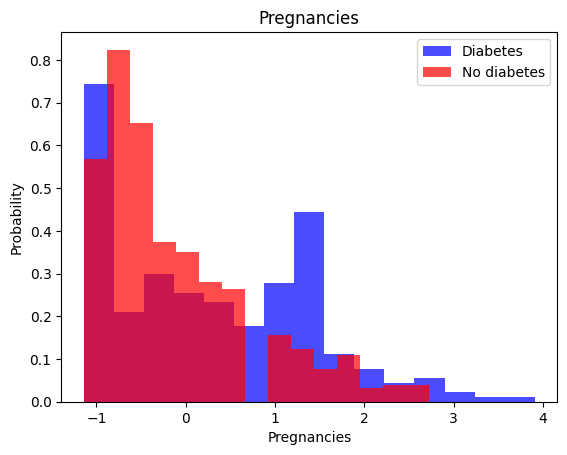

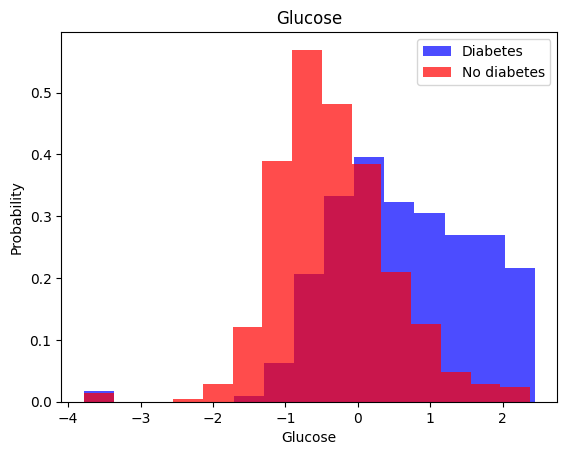

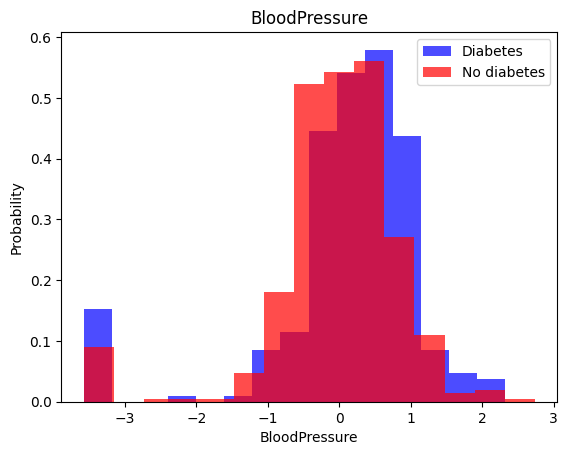

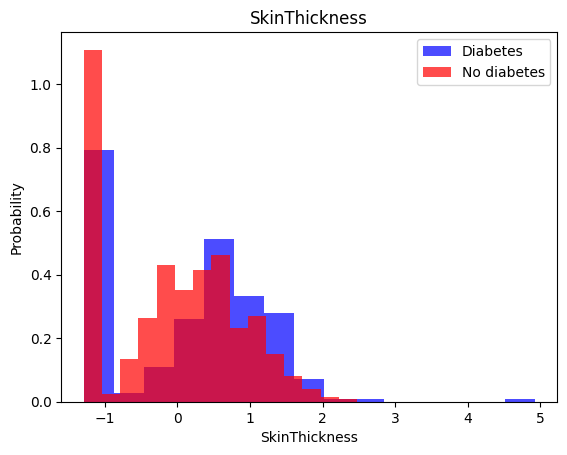

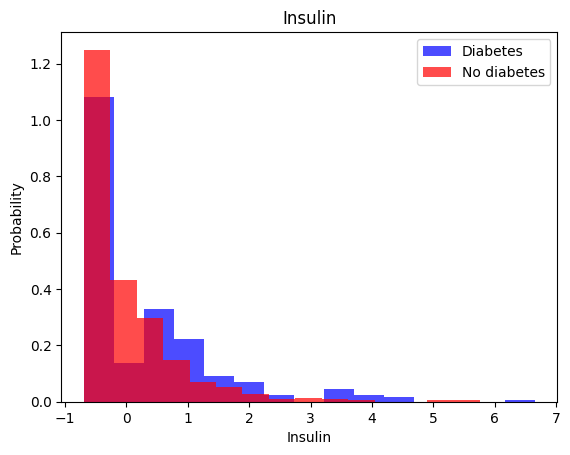

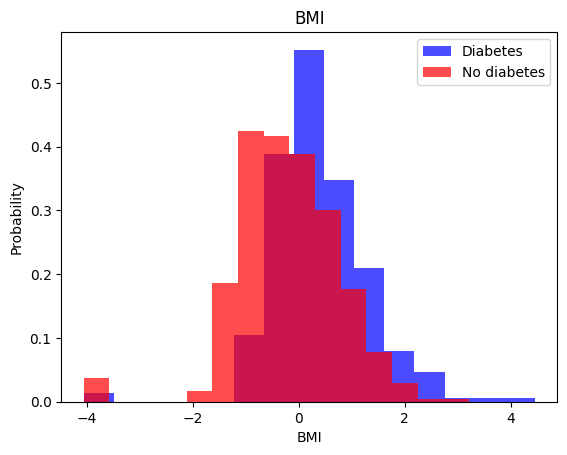

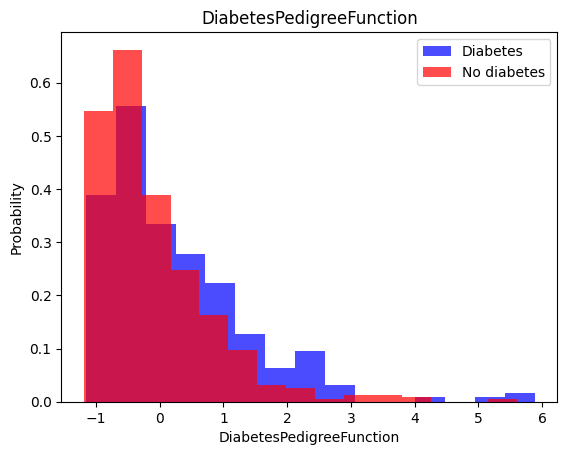

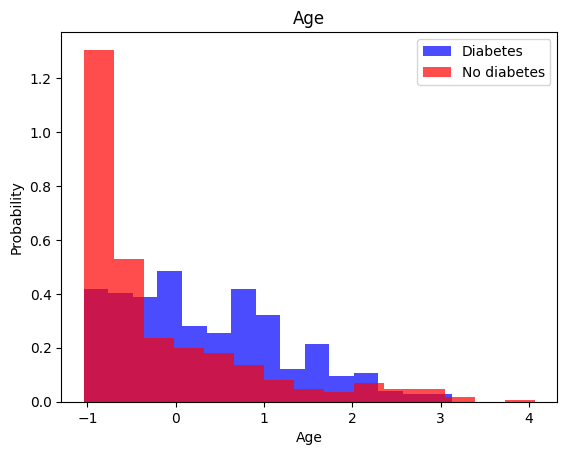

In [23]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue',label="Diabetes",alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label],color='red',label="No diabetes",alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [19]:
X=df[df.columns[:-1]].values
y=df[df.columns[-1]].values

In [21]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
data=np.hstack((X,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [25]:
over=RandomOverSampler()
X,y=over.fit_resample(X,y)
data=np.hstack((X,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)


In [27]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [28]:
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.4,random_state=0)
X_valid,X_test,y_valid,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [29]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),#if x<=0 --> 0,x>0--> x
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryFocalCrossentropy(),
              metrics=['accuracy'])

In [31]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.4950


[0.20400263369083405, 0.4950000047683716]

In [32]:
model.evaluate(X_valid,y_valid)

7/7 [==============================] - 0s 5ms/step - loss: 0.1930 - accuracy: 0.5200


[0.1929931640625, 0.5199999809265137]

In [33]:
model.fit(X_train,y_train,batch_size=16, epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 6ms/step - loss: 0.1795 - accuracy: 0.5767 - val_loss: 0.1579 - val_accuracy: 0.6450
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1512 - accuracy: 0.6917 - val_loss: 0.1468 - val_accuracy: 0.7100
Epoch 3/20
38/38 [==============================] - 0s 6ms/step - loss: 0.1414 - accuracy: 0.7200 - val_loss: 0.1408 - val_accuracy: 0.7200
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.1362 - accuracy: 0.7433 - val_loss: 0.1361 - val_accuracy: 0.7500
Epoch 5/20
38/38 [==============================] - 0s 6ms/step - loss: 0.1318 - accuracy: 0.7517 - val_loss: 0.1322 - val_accuracy: 0.7550
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.1289 - accuracy: 0.7583 - val_loss: 0.1290 - val_accuracy: 0.7450
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.1264 - accuracy: 0.7650 - val_loss: 0.1271 - val_accuracy: 0.7600
Epoch 8/20
38/38 [==

In [34]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 13ms/step - loss: 0.1151 - accuracy: 0.8200


[0.11509143561124802, 0.8199999928474426]